# Задача

Построить нечеткую базу знаний и представить в виде  программного решения.

Для построения нечеткой базы знаний и реализации логического вывода необходимо выполнить следующее:

1)	Сформулировать на естественном языке в виде предложений
«Если…, то…» закономерности предметной области.

2)	Выделить из этих предложений лингвистические переменные, их значения (построить их функции принадлежности), высказывания различных видов, формализовать нечеткие правила.

3)	Проверить полученную базу знаний на полноту.

4)	Провести фаззификацию (входные данные выбираем случайным образом).

5)	Провести агрегирование подусловий и активизацию подзаключений.

6)	Провести аккумулирование заключений.

7)	Провести дефаззицикацию.

# Решение

## Описание на естественном языке

1)	Предложения, описывающие данную задачу, могут быть такими:

•	Если качество предобработки данных высокое или хорошее и нейросеть обучена на малом количестве эпох, то вероятность определения дефекта низкая

•	Если качество предобработки данных высокое или хорошее и нейросеть обучена на большом количестве эпох, то вероятность определения дефекта высокая

•	Если качество предобработки данных низкое и нейросеть обучена на большом количестве эпох, то вероятность определения дефекта достаточно высокая

•	Если качество предобработки данных среднее и нейросеть обучена на достаточно большом количестве эпох, то вероятность определения дефекта достаточно высокая


## Лингвистические переменные

2)	Выделим из предложений лингвистические переменные.
1.	(входная) – «Качество предобработки данных», терм-множество T = («высокое», «среднее», «низкое»), базовое множество X = [0, 100] (четкость видимости дефекта на обработанном снимке от 0 до 100%).
2.	(входная) – «Количество эпох обучения», терм-множество T = («малое», «достаточное», «большое»), базовое множество X = [1, 100] (оптимальное количество эпох до переобучения).
3.	(выходная) – «Вероятность определения дефекта», терм-множество T = («низкая», «достаточная», «высокая»), базовое множество X = [0, 1] (параметр accuracy)


## Программная реализация. Визуализация нечетких переменных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def generate_plot(x0, x1, x2, x3, start, end, title, name, c):
    x = np.linspace(start, end, 1000)
    y = np.piecewise(x, [x < x0, (x0 <= x) & (x < x1), (x1 <= x) & (x < x2), (x2 <= x) & (x < x3), x >= x3],
                     [lambda x: 0, lambda x: c * (x - x0) / (x1 - x0), c * 1, lambda x: c * (1 - (x - x2) / (x3 - x2)), lambda x: 0])

    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel(name)
    plt.ylim(0, 1.1)  # Установим пределы оси Oy от 0 до 1
    plt.grid(True)
    #plt.show()

In [ ]:
class Ling_variable():
    def __init__(self, Beta: str, T: dict, X: list) -> None:
        self.Beta = Beta #наименование переменной
        self.T = T #терм-множество с распределением термов на базовом множестве
        self.X = X #базовое множество

    def show_fuzzy_variable(self, var, coef):
      generate_plot(self.T[var][0],
                      self.T[var][1],
                      self.T[var][2],
                      self.T[var][3],
                      self.X[0],
                      self.X[1],
                      self.Beta,
                      var,
                        coef)

    def show_fuzzy_variables(self, plots_per_row = 3):
      num_plots = len(self.T)
      num_rows = num_plots// plots_per_row

      fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(18, 5*num_rows))
      axes = axes.flatten()

      for i, var in enumerate(self.T):
          plt.sca(axes[i])
          generate_plot(self.T[var][0],
                      self.T[var][1],
                      self.T[var][2],
                      self.T[var][3],
                      self.X[0],
                      self.X[1],
                      self.Beta,
                      var,
                        1)

      # Дополнительная настройка, если необходимо
      #plt.tight_layout()
      plt.show()

    def simplest_statements(self, x):
      x = float(x)
      certainty = self.T.copy()
      for var in certainty:
        x0, x1, x2, x3 = certainty[var]
        y = np.piecewise(x, [x < x0, (x0 <= x) & (x < x1), (x1 <= x) & (x < x2), (x2 <= x) & (x < x3), x >= x3],
                      [lambda x: 0, lambda x: (x - x0) / (x1 - x0), 1, lambda x: 1 - (x - x2) / (x3 - x2), lambda x: 0])
        certainty.update({var: float(y)})
      return certainty

In [ ]:
preprocessing_quality = Ling_variable('Качество обработки данных',
                                       {'низкое': (0, 20, 40, 50), 'среднее': (40, 50, 50, 80), 'высокое': (70, 80, 100, 101)},
                                       [0, 100])
epochs = Ling_variable('Количество эпох',
                        {'малое': (1, 10, 25, 50), 'достаточное': (20, 50, 50, 80), 'большое': (70, 80, 100, 101)},
                        [1, 100])
accuracy = Ling_variable('Вероятность определения дефекта',
                          {'низкая': (0, 0.1, 0.3, 0.5), 'достаточная': (0.5, 0.7, 0.7, 1), 'высокая': (0.7, 0.9, 1, 1.1)},
                          [0, 1])

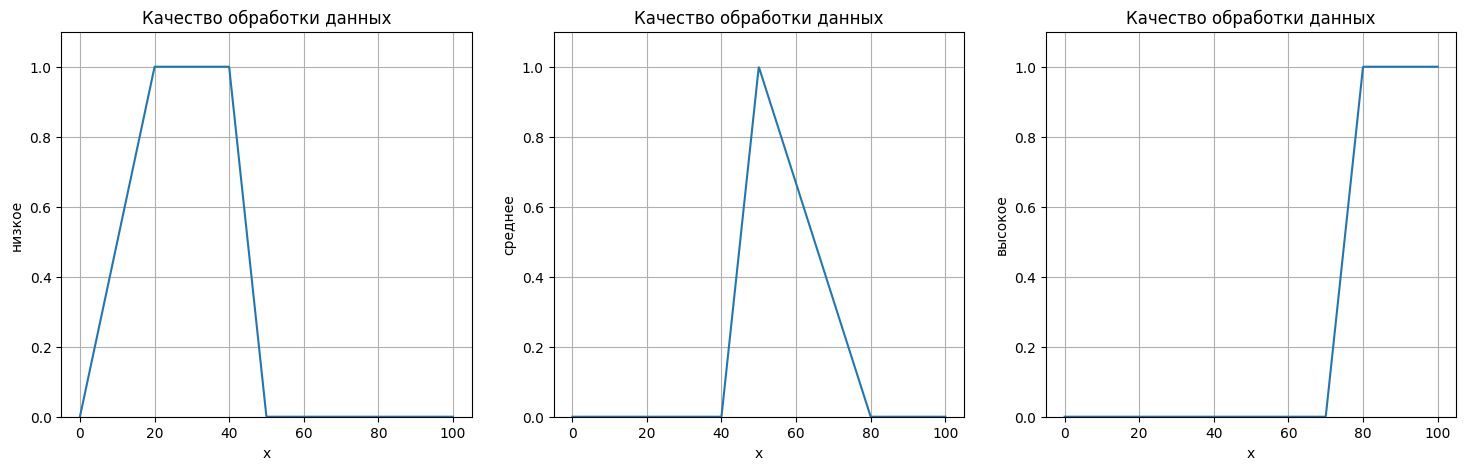

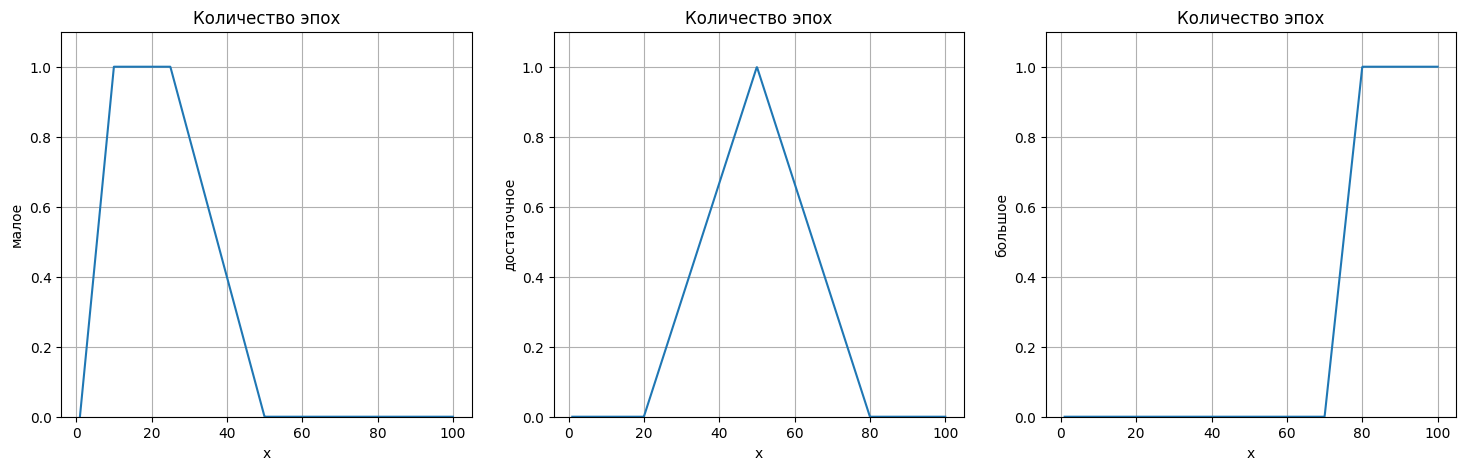

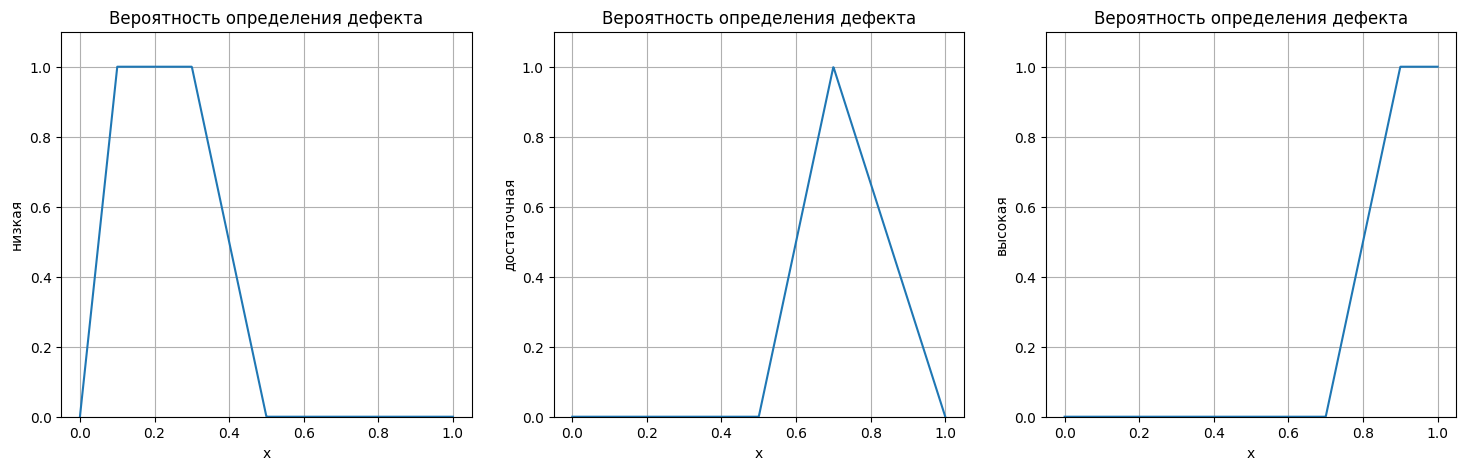

In [ ]:
preprocessing_quality.show_fuzzy_variables()
epochs.show_fuzzy_variables()
accuracy.show_fuzzy_variables()

## Формализация нечетких правил

1.	Если Качество предобработки данных = «высокое» или Качество предобработки данных = «среднее» и  Количество эпох обучения = «малое», то Вероятность определения дефекта = «низкая».
2.	Если Качество предобработки данных = «высокое» или Качество предобработки данных = «среднее» и  Количество эпох обучения = «большое», то Вероятность определения дефекта = «высокая».
3.	Если Качество предобработки данных = «низкое» и Количество эпох обучения =
«большое», то Вероятность определения дефекта = «высокая».
4.	Если Качество предобработки данных = «среднее» и Количество эпох обучения =
«достаточное», то Вероятность определения дефекта = «достаточная».


## Проверка на полноту

•	существует хотя бы одно правило для каждого лингвистического терма выходной переменной (выходная переменная «Вероятность определения дефекта» имеет 3 терма: «низкая» используется в 1 правиле, «достаточная» - в 4, «высокая» - в 2 и 3);

•	для любого терма входной переменной имеется хотя бы одно правило, в котором этот терм используется в качестве посылки (есть две входных переменных «Качество предобработки данных» и «Количество эпох обучения», у каждой из них 3 терма: «высокое» используется в 1 и 2 правиле, «среднее» - 1,2 и 4, «низкое» - в 3, «малое» - в 1, «достаточное» - 4, «большое» - 3 и 2).

Значит, полученная база нечетких правил полная.



## Агрегирование подусловий и активизация подзаключений

Пусть имеется снимок, четкость отображения полимерного материала на котором составляет 70%. Он загружается в нейросеть, которая была обучена на 50 эпохах.
Определим степени уверенности простейших утверждений:


In [ ]:
st_pq = preprocessing_quality.simplest_statements(70)
for i in st_pq:
  print(f'{preprocessing_quality.Beta} - {i} - {st_pq[i]}')
st_e = epochs.simplest_statements(50)
for i in st_e:
  print(f'{epochs.Beta} - {i} - {st_e[i]}')

Качество обработки данных - низкое - 0.0
Качество обработки данных - среднее - 0.33333333333333337
Качество обработки данных - высокое - 0.0
Количество эпох - малое - 0.0
Количество эпох - достаточное - 1.0
Количество эпох - большое - 0.0


Определим степени уверенности посылок правил:

In [ ]:
rule1 = min(max(st_pq['высокое'], st_pq['среднее']), st_e['малое'])
rule2 = min(max(st_pq['высокое'], st_pq['среднее']), st_e['большое'])
rule3 = min(st_pq['низкое'], st_e['большое'])
rule4 = min(st_pq['среднее'], st_e['достаточное'])

In [ ]:
print('Правило 1:', rule1)
print('Правило 2:', rule2)
print('Правило 3:', rule3)
print('Правило 4:', rule4)

Правило 1: 0.0
Правило 2: 0.0
Правило 3: 0.0
Правило 4: 0.33333333333333337


Построим новую выходную нечеткую переменную, используя полученные степени уверенности:

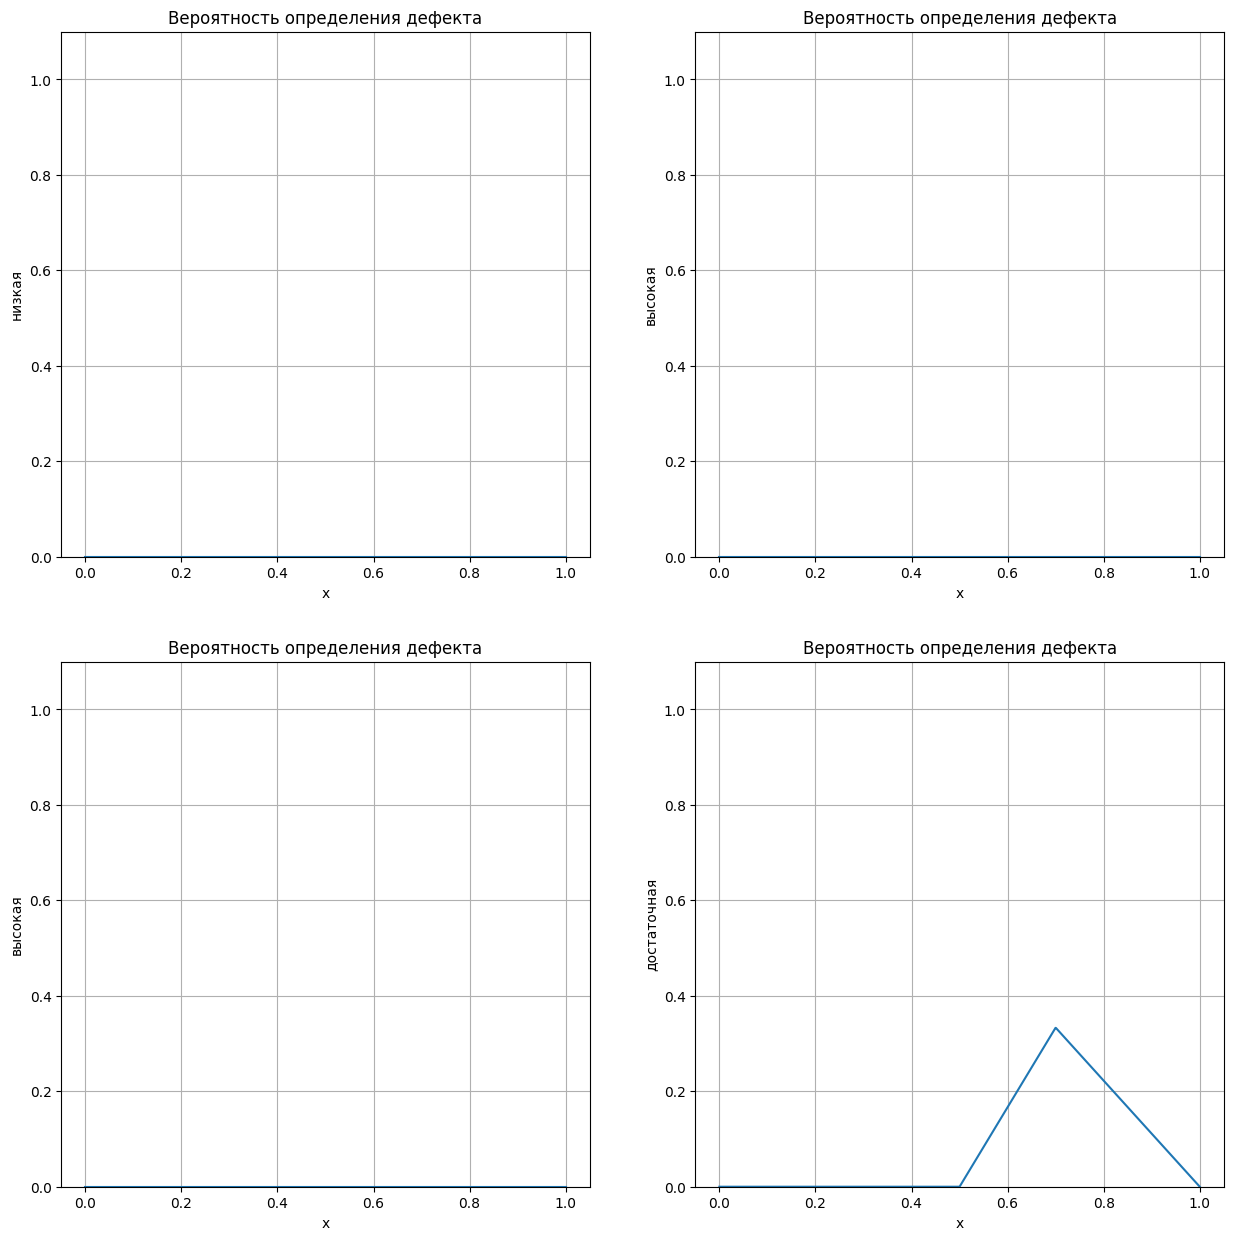

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()
plt.sca(axes[0])
accuracy.show_fuzzy_variable('низкая', rule1)

plt.sca(axes[1])
accuracy.show_fuzzy_variable('высокая', rule2)

plt.sca(axes[2])
accuracy.show_fuzzy_variable('высокая', rule3)

plt.sca(axes[3])
accuracy.show_fuzzy_variable('достаточная', rule4)

plt.show()

## Аккумулирование заключений

## Дефаззицикацию